**Table of contents**<a id='toc0_'></a>    
- [Unsupervised Learning](#toc1_)    
  - [Load breast cancer data](#toc1_1_)    
  - [Dimensionality reduction](#toc1_2_)    
    - [PCA (Principal Component Analysis)](#toc1_2_1_)    
    - [How to choose the number of principal components?](#toc1_2_2_)    
  - [Clustering](#toc1_3_)    
    - [Centroid-based clustering - K-Means](#toc1_3_1_)    
      - [Elbow method - choosing the # of clusters](#toc1_3_1_1_)    
    - [Agglomerative/Hierarchical/Connectivity-based clustering](#toc1_3_2_)    
      - [Complete linkage](#toc1_3_2_1_)    
      - [Single linkage](#toc1_3_2_2_)    
      - [Ward linkage](#toc1_3_2_3_)    
    - [Where is agglomerative clustering better than centroid-based clustering?](#toc1_3_3_)    
    - [Density-based clustering - DBSCAN (Density-based spatial clustering of applications with noise)](#toc1_3_4_)    
  - [Clustering metrics](#toc1_4_)    
- [Resources](#toc2_)    
- [References](#toc3_)    
- [Acknowledgements](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Unsupervised Learning](#toc0_)

In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'simple_white'

import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn import cluster, datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer

## <a id='toc1_1_'></a>[Load breast cancer data](#toc0_)

In [58]:
# Unsupervised Learning Class
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [59]:
X = cancer['data']
y = cancer['target']
display(X.shape)
display(y.shape)

(569, 30)

(569,)

In [60]:
# let's visualize all the data in a dataframe
data = pd.DataFrame(X, columns=cancer['feature_names'])
data['label'] = y
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## <a id='toc1_2_'></a>[Dimensionality reduction](#toc0_)

### <a id='toc1_2_1_'></a>[PCA (Principal Component Analysis)](#toc0_)

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

![](https://imgs.search.brave.com/1u8pddu4FRUlSAuxj0i992lYN__bYby0JDUEqF2abEM/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9icmFk/bGV5Ym9laG1rZS5n/aXRodWIuaW8vSE9N/TC8xNS1wY2FfZmls/ZXMvZmlndXJlLWh0/bWwvY3JlYXRlLXBj/YS1pbWFnZS0xLnBu/Zw)  
(Source: [Hands-on Machine Learning with R, Bradley Boehmke](https://bradleyboehmke.github.io/HOML/pca.html))

For this dataset, we're not looking to predict whether or not a patient has a malignant/benign tumour, but if we can create 2 clusters corresponding to the most similar tumours. However, we think that the malignant tumours are significantly different from benign tumours, which is why we're looking to see if we can separate clusters based on the tumour type.

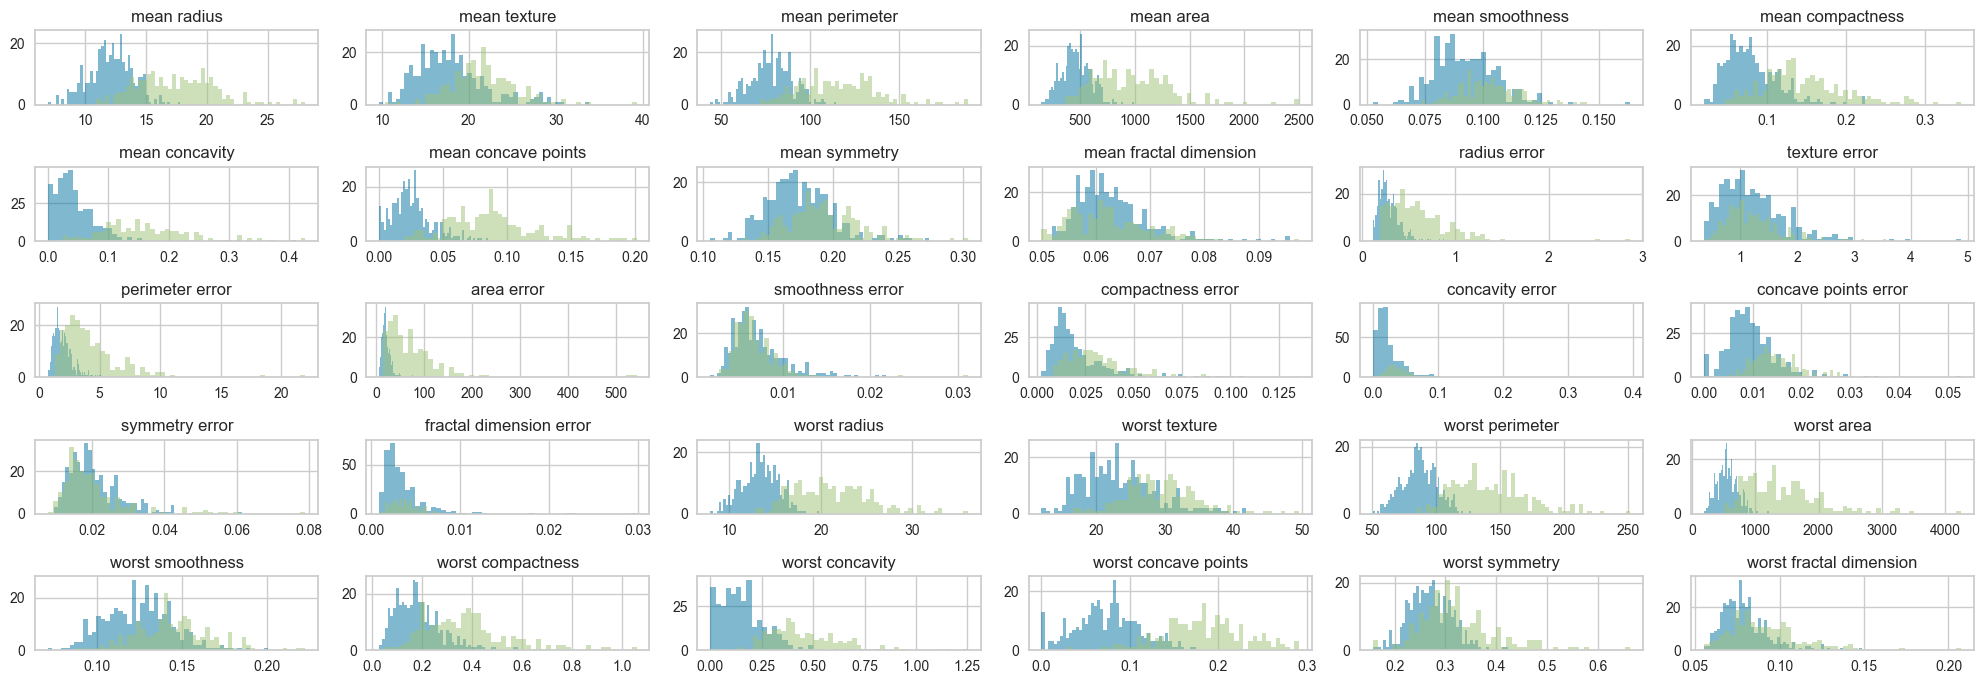

In [61]:
#check differences between features and labels
plot_options, charts = plt.subplots(5, 6, figsize=(20, 7))
malignant = data[data['label'] == 1]
benign = data[data['label'] == 0]
#ravel flattens the array so we don't need 2 indexes
charts_1d = charts.ravel()
for i in range(30):
  charts_1d[i].hist(malignant.iloc[:, i], bins=50, alpha=.5)
  charts_1d[i].hist(benign.iloc[:, i], bins=50, alpha=.5)
  charts_1d[i].set_title(data.columns[i])
  plot_options.tight_layout()

Ideally, we'd want to see if we can cluster the tumours based on multiple features (like we did for the iris dataset some time ago) but in this case we have >30 labels, which makes a pairplot take ages to run...

In [ ]:
# sns.pairplot(data, hue = 'label')

We can still look to see if we can separate clusters based on 2 features at a time:

In [65]:
# Cluster boundary for features 1, 29
fig = px.scatter(x=data.iloc[:, 0], y=data.iloc[:, 20], color=y, opacity=0.5)
fig.update_layout(xaxis_title=data.columns[0], yaxis_title=data.columns[20], height=600, width=600)
fig.show()

# Cluster boundary for features 28, 29
fig = px.scatter(x=data.iloc[:, 28], y=data.iloc[:, 29], color=y, opacity=0.5)
fig.update_layout(xaxis_title=data.columns[28], yaxis_title=data.columns[29], height=600, width=600)
fig.show()

In [66]:
# Scale data
scaler = MinMaxScaler()
scaler.fit(cancer['data'])

X_scaled = scaler.transform(cancer['data'])
pd.DataFrame(X_scaled, columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


Why do we need to perform scaling before running the PCA?

In [67]:
# create the PCA object
# the number of components chosen will be the new number of features!
pca = PCA(n_components=3)
# fit the PCA model to breast cancer data
pca.fit(X_scaled)
# it's like we have three new axis (those defined by the PCA principal components)
X_pca = pca.transform(X_scaled)
pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2', 'PCA_3'])

,PCA_1,PCA_2,PCA_3
0,1.387021,0.426895,-0.541702
1,0.462308,-0.556947,-0.205175
2,0.954621,-0.109701,-0.147848
3,1.000816,1.525089,-0.053271
4,0.626828,-0.302471,-0.409336
...,...,...,...
564,1.002840,-0.474785,-0.100041
565,0.620757,-0.517200,0.400360
566,0.226311,-0.287946,0.315224
567,1.677834,0.335946,0.296116


In [69]:
display(X.shape)
display(X_pca.shape)

(569, 30)

(569, 3)

In [70]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y, opacity=0.5)
fig.update_layout(xaxis_title='1st principal component', yaxis_title='2nd principal component', height=600, width=600)
fig.show()

fig = px.scatter(x=X_pca[:, 1], y=X_pca[:, 2], color=y, opacity=0.5)
fig.update_layout(xaxis_title='2nd principal component', yaxis_title='3rd principal component', height=600, width=600)
fig.show()

fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 2], color=y, opacity=0.5)
fig.update_layout(xaxis_title='1st principal component', yaxis_title='3rd principal component', height=600, width=600)
fig.show()

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Baseline - all features

In [76]:
lr_model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.97      0.99        80

    accuracy                           0.98       114
   macro avg       0.97      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



PCA features

In [82]:
lr_model = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :2], y,test_size=0.2, random_state=4)
lr_model.fit(X_train, y_train)
print(lr_model.score(X_test, y_test))
print(classification_report(y_test, lr_model.predict(X_test)))

0.956140350877193
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.99      0.95      0.97        80

    accuracy                           0.96       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



### <a id='toc1_2_2_'></a>[How to choose the number of principal components?](#toc0_)

In [86]:
pca.explained_variance_ratio_

array([0.53097689, 0.1728349 , 0.07114442])

In [83]:
# Each PCA feature has a little bit of each original feture
# The PCA tells you how much of the original features each new feature contains
pd.DataFrame(pca.components_, columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.242676,0.096479,0.252550,0.216495,0.109695,0.240398,0.301914,0.322475,0.111432,0.043298,...,0.259387,0.113833,0.260708,0.205918,0.123774,0.204993,0.244084,0.371065,0.095923,0.094634
1,-0.261317,-0.059058,-0.238590,-0.231107,0.199884,0.213915,0.113811,-0.008312,0.211115,0.406392,...,-0.244282,-0.039682,-0.211635,-0.198979,0.229455,0.198064,0.154982,0.044329,0.151169,0.258092
2,-0.059522,0.598472,-0.059326,-0.051718,-0.124020,-0.040102,-0.018927,-0.086422,-0.042714,-0.027881,...,-0.034688,0.675734,-0.031714,-0.025986,-0.047604,0.037560,0.032137,-0.071197,-0.006967,0.025389


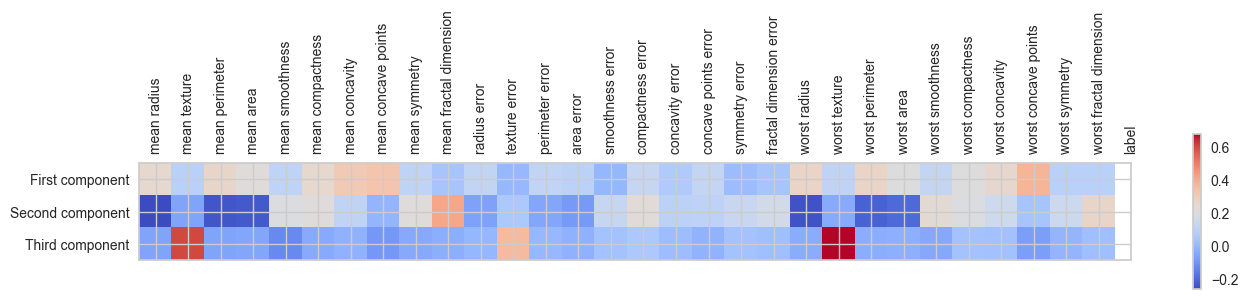

In [84]:
# Matplotlib
plt.matshow(pca.components_, cmap='coolwarm')
plt.yticks([0, 1, 2], ["First component", "Second component","Third component"])
plt.colorbar()
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.show()

> Mathematically, the new features (principal components) are a LINEAR COMBINATION of the previous (old) features and the weights of each of them are represented in the diagram above.

## <a id='toc1_3_'></a>[Clustering](#toc0_)

### <a id='toc1_3_1_'></a>[Centroid-based clustering - K-Means](#toc0_)

![](https://cdn.sanity.io/images/kuana2sp/production/4a7a2b92082d482c56e0c6396064ca23074168ac-1020x752.png?w=1080&fit=max&auto=format)  
(Source: [Getting started with k-means clustering in Python, Dr J Rogel-Salazar](https://domino.ai/blog/getting-started-with-k-means-clustering-in-python))

In [87]:
# Creating 3 clusters artificially to illustrate the algorithm
n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, n_features=2, random_state=0)

Review initial data:

In [88]:
fig = px.scatter(x=X[:, 0], y=X[:, 1], opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

Run clustering with:

a) k = 3

In [89]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
pred = kmeans.predict(X)

fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

b) k = 2

In [90]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
pred = kmeans.predict(X)

fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

c) k = 4

In [91]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)
pred = kmeans.predict(X)

fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

#### <a id='toc1_3_1_1_'></a>[Elbow method - choosing the # of clusters](#toc0_)

We can select a number of clusters using the elbow heuristic:

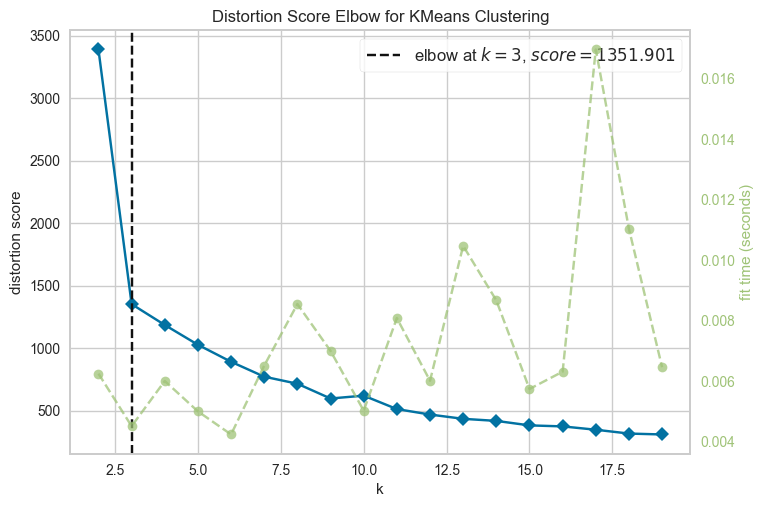

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [92]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.poof()

In [97]:
# Creating 3 clusters artificially to illustrate the algorithm
n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=12, cluster_std=1.4, n_features=2, random_state=0)

In [98]:
fig = px.scatter(x=X[:, 0], y=X[:, 1], opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

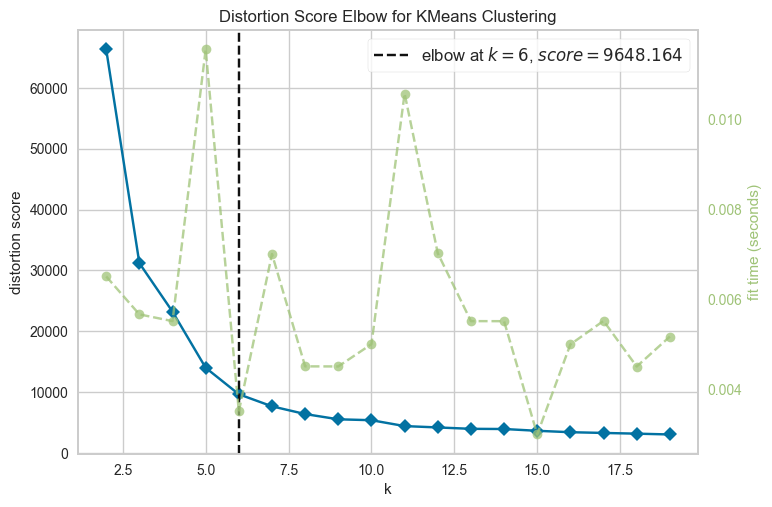

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [99]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.poof()

Technically, any k between 4 and 8 would be good enough for this problem. Remember, we're not looking to minimize the error in this case!

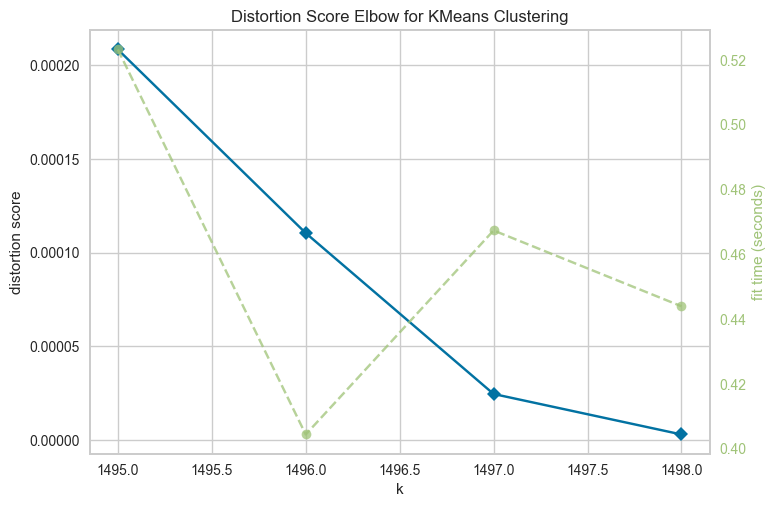

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [100]:
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1495,1499))
visualizer.fit(X)
visualizer.poof()

If we try to minimize the error, we end up with an unusable number of clusters, which defeats the purpose of running the algorithm to begin with.

### <a id='toc1_3_3_'></a>[Where is agglomerative clustering better than centroid-based clustering?](#toc0_)

In [102]:
# Create moon-like clusters instead
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)

In [103]:
fig = px.scatter(x=X[:, 0], y=X[:, 1], opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

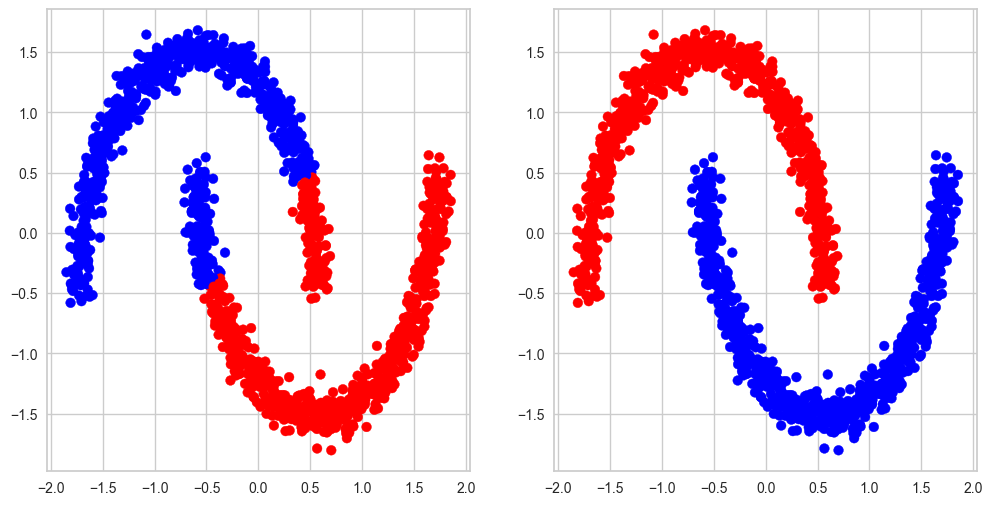

In [104]:


X = StandardScaler().fit_transform(X)

# Run K-Means on non-radial clusters
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y1_pred = kmeans.predict(X)

# Run Agglomerative clustering on non-radial clusters
single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X)

# Review results
options, charts = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
charts[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
charts[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
plt.show()

### <a id='toc1_3_2_'></a>[Agglomerative/Hierarchical/Connectivity-based clustering](#toc0_)

![](https://media.geeksforgeeks.org/wp-content/uploads/20200204181551/Untitled-Diagram71.png)  
(Source: [Hierarchical Clustering in Machine Learning, Geeks 4 Geeks](https://www.geeksforgeeks.org/ml-hierarchical-clustering-agglomerative-and-divisive-clustering/))

#### <a id='toc1_3_2_1_'></a>[Complete linkage](#toc0_)

When calculating the distance between 2 clusters or a point and a cluster, it extracts the **maximum** possible distance.

In [106]:
# complete linkage penalizes heavily outliers
agglomerative = cluster.AgglomerativeClustering(n_clusters=2, linkage='complete')
pred = agglomerative.fit_predict(X)

fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

#### <a id='toc1_3_2_2_'></a>[Single linkage](#toc0_)

When calculating the distance between 2 clusters or a point and a cluster, it extracts the **minimum** possible distance.

In [107]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
pred = agglomerative.fit_predict(X)

fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

#### <a id='toc1_3_2_3_'></a>[Ward linkage](#toc0_)

This linkage looks not at distance between clusters, but at how much the variance of clusters increases after each step, then chooses the option leading to the minimal variance increase. This is why this method **tends to produce relatively equally sized clusters**.

In [109]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=2, linkage='ward')
pred = agglomerative.fit_predict(X)

fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

### <a id='toc1_3_4_'></a>[Density-based clustering - DBSCAN (Density-based spatial clustering of applications with noise)](#toc0_)

> In density-based clustering, clusters are defined as areas of higher density than the remainder of the data set. Objects in sparse areas – that are required to separate clusters – are usually considered to be noise and border points.

In [110]:
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)

In [112]:
dbs = cluster.DBSCAN(eps=0.1, min_samples=5) #change maximum distance and see efect
# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point.

pred = dbs.fit_predict(X)
print(pred)
set(pred)

[0 1 0 ... 1 1 0]


{-1, 0, 1}

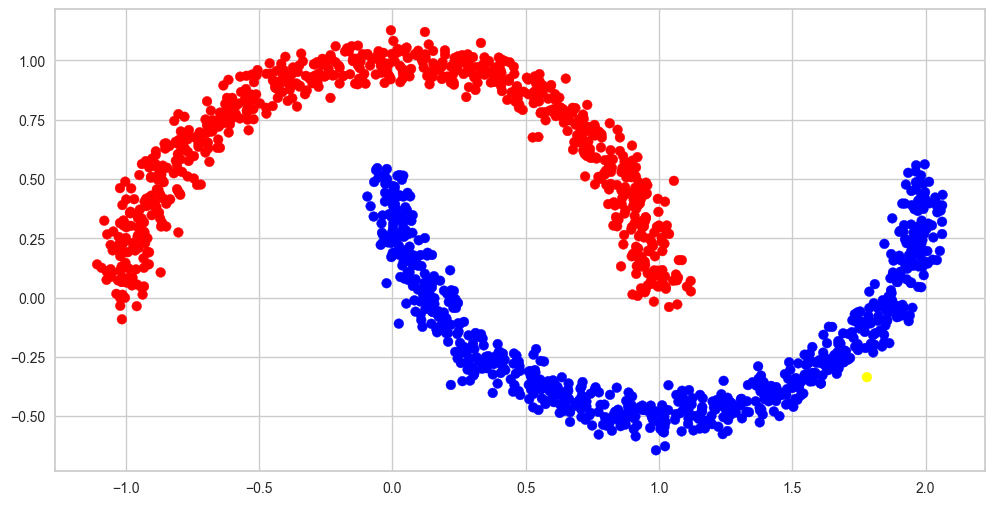

In [113]:

plt.figure(figsize=(12, 6))

colors = np.array(['blue', 'red', 'black', 'green', 'yellow'])
plt.scatter(X[:, 0], X[:, 1], color=colors[pred])

plt.show()

In [114]:
dbs = cluster.DBSCAN(eps=0.05, min_samples=5) #change maximum distance and see efect
# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point.

pred = dbs.fit_predict(X)
print(pred)
set(pred)

[0 1 0 ... 1 1 0]


{-1, 0, 1, 2}

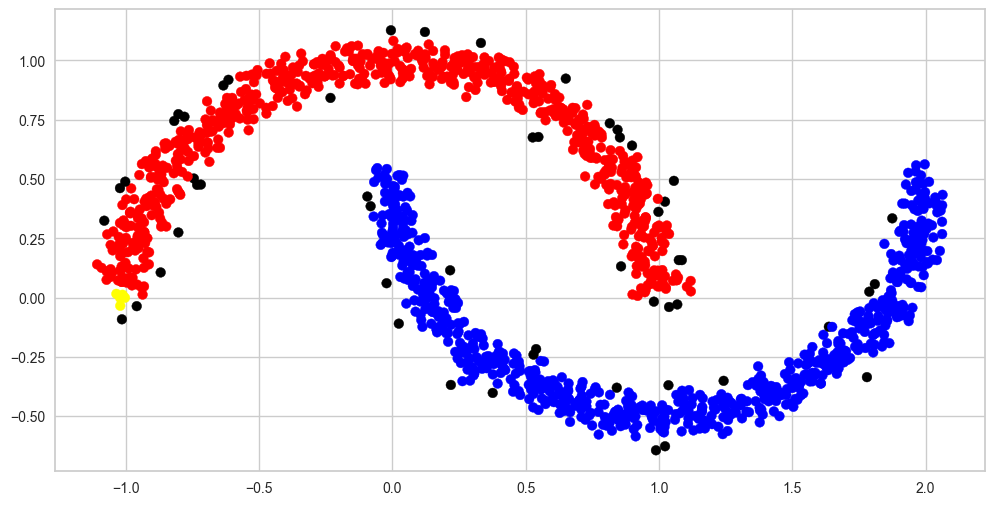

In [116]:

plt.figure(figsize=(12, 6))

colors = np.array(['blue', 'red', 'yellow', 'green', 'black'])
plt.scatter(X[:, 0], X[:, 1], color=colors[pred])

plt.show()

## <a id='toc1_4_'></a>[Clustering metrics](#toc0_)

**Silhouette Score** [$^{[3]}$](https://www.educative.io/answers/what-is-silhouette-score)

> Silhouette Score is a tool for assessing the appropriateness of clustering results by providing a quantitative measure of how well-defined and distinct the clusters are. The Silhouette Score quantifies **how well a data point fits into its assigned cluster** and **how distinct it is from other clusters** 

Silhouette Score = $\frac{(b - a)}{max(a, b)}$

In [117]:
# Re-create clusters
n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, n_features=2, random_state=0)

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
pred = kmeans.predict(X)

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

Model 1 Silhouette Score: 0.6056399066187851


In [118]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='complete')
pred = agglomerative.fit_predict(X)

print("Model 2 Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

Model 2 Silhouette Score: 0.528140155059521


In [119]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='single')
pred = agglomerative.fit_predict(X)

print("Model 3 Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

Model 3 Silhouette Score: -0.00722867792759676


> The Silhouette Score ranges from -1 to +1. Here is how to interpret the value: [$^{[3]}$](https://www.educative.io/answers/what-is-silhouette-score)

**Negative**
> A negative score indicates that the **data point is likely assigned to the wrong cluster**, as its distance to its assigned cluster’s points is greater than its distance to the nearest neighboring cluster’s points.

**Close to 0**
> A score close to 0 implies that the **data point is on or very close to the decision boundary between two clusters**. It indicates that the clustering is not well-defined and can be ambiguous.

**Positive**
> A positive score indicates that the **data point is appropriately clustered**, and **its distance to its assigned cluster’s points is smaller than its distance to the nearest neighboring cluster’s points**. A score close to +1 suggests that the data point is well-clustered and distinctly separated from other clusters. It is a strong indication of a meaningful clustering result.

Where does the silhouette score fail to be a good measure?

In [ ]:
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
X = StandardScaler().fit_transform(X)

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y1_pred = kmeans.predict(X)


single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X)


options, charts = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
charts[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
charts[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
plt.show()

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))

# <a id='toc2_'></a>[Resources](#toc0_)

PCA by StatQuest:
- [Main ideas (5 min)](https://www.youtube.com/watch?v=HMOI_lkzW08)
- [Step-by-step (22 min)](https://www.youtube.com/watch?v=FgakZw6K1QQ)
- [Practical Tips (8 min)](https://www.youtube.com/watch?v=oRvgq966yZg)  

[t-SNEs by StatQuest (12 min)](https://www.youtube.com/watch?v=NEaUSP4YerM)

# <a id='toc3_'></a>[References](#toc0_)

[1] [What is Silhouette Score, Educative IO](https://www.educative.io/answers/what-is-silhouette-score)

# <a id='toc4_'></a>[Acknowledgements](#toc0_)

Thank you, David Henriques, for your awesome lesson structure and content!